313/313 [==============================] - 1s 2ms/step - loss: 0.1919 - accuracy: 0.9454
Test Loss: 0.1919, Test Accuracy: 0.9454


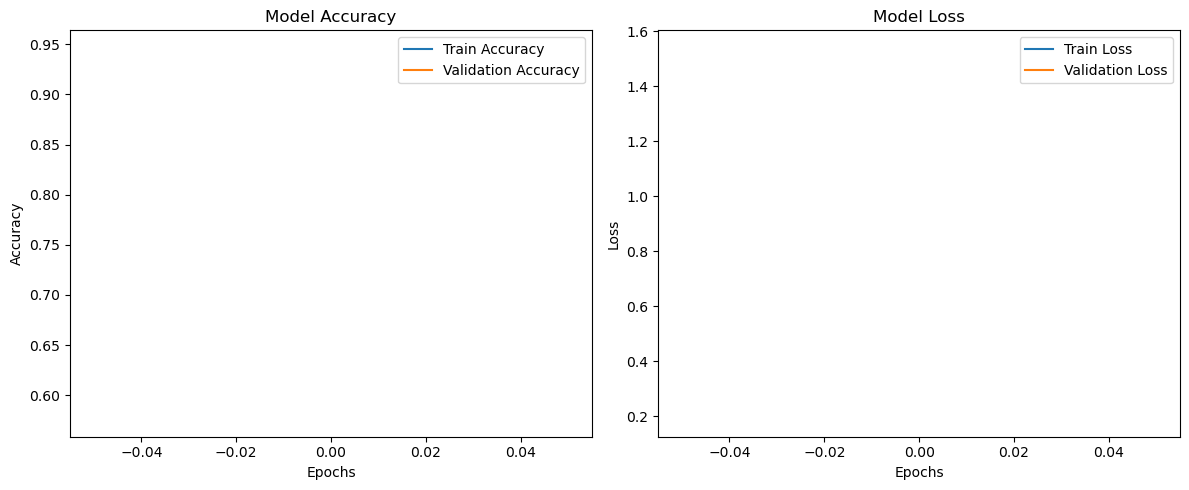

1/1 [==============================] - 0s 124ms/step
True Label: 53, Predicted Class: 53


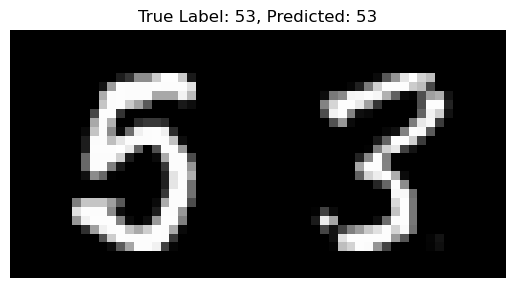

In [1]:
# -*- coding: utf-8 -*-
"""Untitled7.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1LIeFyj0tLQqes50KmiLEjsZcdm39aoYc
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the dataset from .npz file
file_path = r"C:\Users\ganes\Downloads\Image classification\mnist_compressed.npz"  # Update with your file path
data = np.load(file_path)

# Extract training and testing data
X_train = data['train_images']  # Shape: (num_train_samples, height, width)
y_train = data['train_labels']  # Shape: (num_train_samples,)
X_test = data['test_images']    # Shape: (num_test_samples, height, width)
y_test = data['test_labels']    # Shape: (num_test_samples,)

# Step 2: Preprocess the data
# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to include the channel dimension
X_train = np.expand_dims(X_train, axis=-1)  # Shape: (num_train_samples, height, width, 1)
X_test = np.expand_dims(X_test, axis=-1)    # Shape: (num_test_samples, height, width, 1)

# One-hot encode the labels (for multi-class classification)
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use 'softmax' for multi-class classification
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Step 7: Visualize training performance
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Predict on a single test case
test_index = 0  # Index of the test image to predict
test_image = X_test[test_index]  # Extract the test image
test_label = np.argmax(y_test[test_index])  # Get the true label

# Expand dimensions of the image for prediction
test_image_expanded = np.expand_dims(test_image, axis=0)

# Predict the class
predicted_probabilities = model.predict(test_image_expanded)
predicted_class = np.argmax(predicted_probabilities)

# Display the prediction
print(f"True Label: {test_label}, Predicted Class: {predicted_class}")

# Visualize the test image
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {test_label}, Predicted: {predicted_class}")
plt.axis('off')
plt.show()



